In [4]:
df=pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
x = df.iloc[:,3:] #[all the rows,3 onwards all cols]

In [7]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


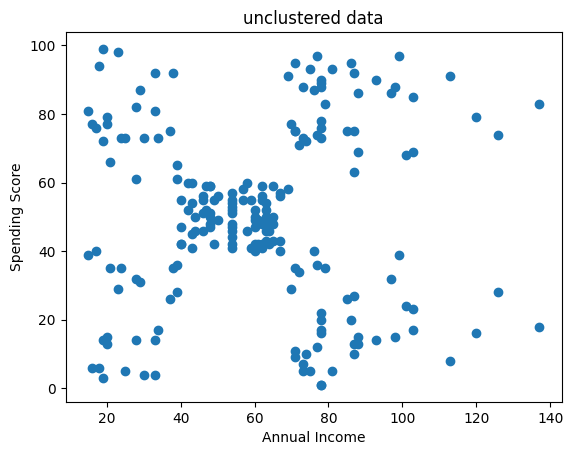

In [11]:
plt.title('unclustered data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])
#unlabelled daat

In [12]:
#clustered data-labelled data
from sklearn.cluster import KMeans, AgglomerativeClustering

In [19]:
km=KMeans(n_clusters=3) #no of clusters 3 . ie k=3
km.fit_predict(x)
#in op having same no are connected points

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [15]:
x.shape

(200, 2)

In [21]:
km.inertia_
#sum squared error vary with k (SSE)

106348.37306211118

In [50]:
sse=[]
for k in range (1,16):
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [51]:
sse

[269981.28,
 181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484346,
 35307.70296416017,
 30037.743538849874,
 22865.352220967437,
 22833.463658203662,
 19176.98248903874,
 17678.93134002489,
 15265.936268104262,
 14710.831601731603,
 12600.957785094164]

In [52]:
print(len(sse))

15


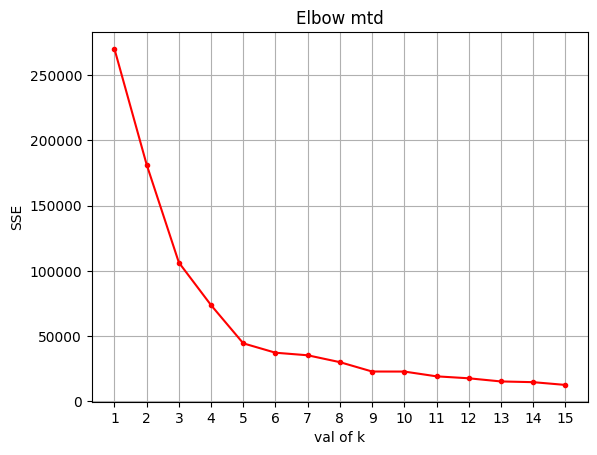

In [54]:
plt.title('Elbow mtd')
plt.xlabel('val of k')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='.',color='red')

In [55]:
# silhoutte mtd/score range betn [-1,1]
# +1 = indicates point is away from its neighboring cluster
# -1 = indicates point is close to its neighboring cluster
# silhoutte point more nearest the cluster points

In [57]:
from sklearn.metrics import silhouette_score

In [60]:
silh=[]
for k in range (2,16):
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    labels=km.fit_predict(x)
    score=silhouette_score(x, labels)
    silh.append(score)
    

In [61]:
silh

[np.float64(0.38174160006733343),
 np.float64(0.46761358158775435),
 np.float64(0.40399150575830317),
 np.float64(0.553931997444648),
 np.float64(0.5367558067779578),
 np.float64(0.5020670377583197),
 np.float64(0.4560651127469469),
 np.float64(0.40462506370186807),
 np.float64(0.4412581308757936),
 np.float64(0.44475449049389404),
 np.float64(0.44305222640720215),
 np.float64(0.39820909940287197),
 np.float64(0.41623453275477873),
 np.float64(0.4187910322219639)]

<BarContainer object of 14 artists>

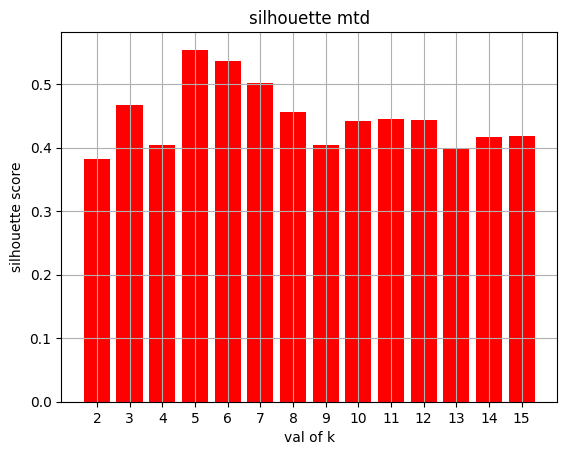

In [62]:
#barplot
plt.title('silhouette mtd')
plt.xlabel('val of k')
plt.ylabel('silhouette score')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16),silh,color='red')

In [72]:
km=KMeans(n_clusters= 5,random_state=0)

In [73]:
labels=km.fit_predict(x)

In [74]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [81]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [83]:
cent=km.cluster_centers_

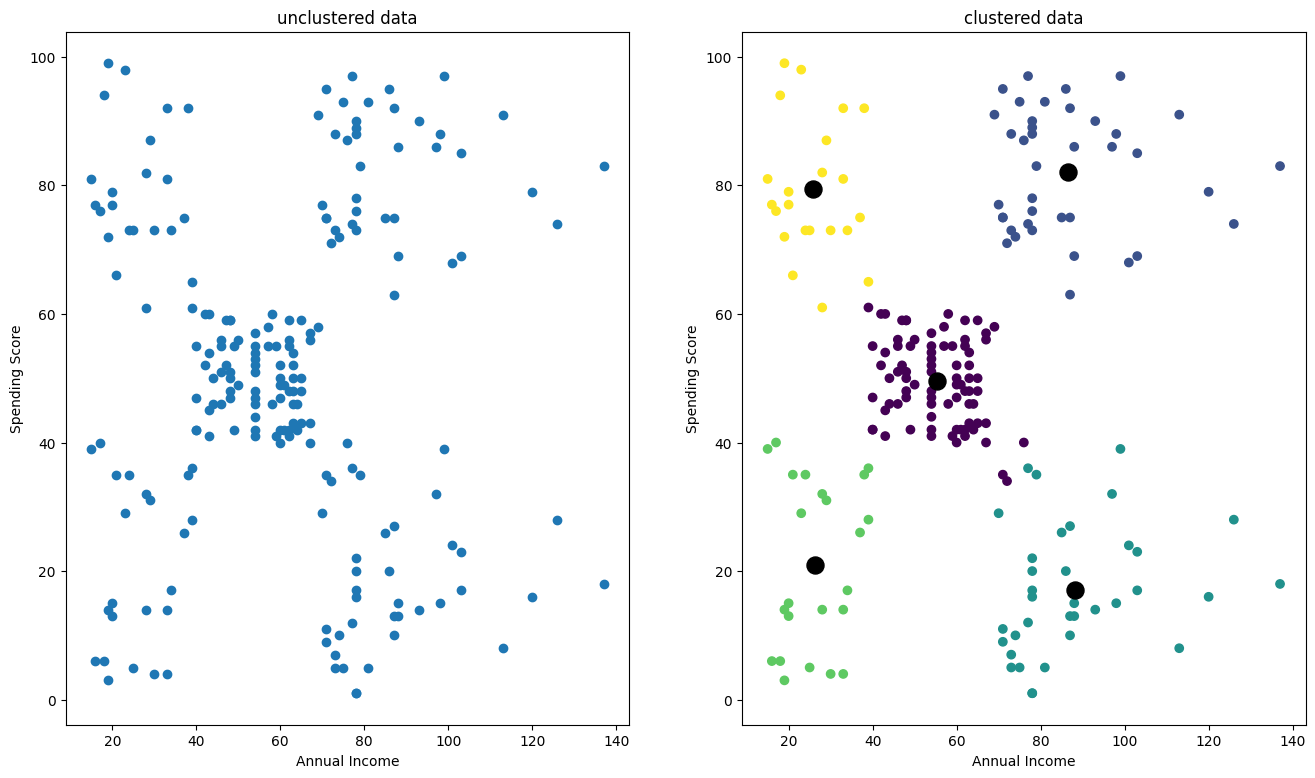

In [88]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1) #(row,col,plot no)
plt.title('unclustered data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

plt.subplot(1,2,2) #(row,col,plot no)
plt.title('clustered data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)
plt.scatter(cent[:,0],cent[:,1],s=150,color='k') #k=black s=size
# c=labels ie points having same label no will have same color




In [89]:
km.inertia_

44448.45544793371

In [90]:
km.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [91]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [93]:
#seperate out cluster
df[labels==4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98


In [95]:
#to save this cluster seperately
four = df[labels==4]
four.to_csv('my_clust_4.csv')

In [96]:
 km.predict([[46,78]])

C:\Users\Sayali\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)